# Resolución parcial integrador

Segundo cuatrimestre turno noche

## Indice

* <a href="#Ejercicio-1">Ejercicio 1</a> - Propiedades esperanza y varianza
* <a href="#Ejercicio-2">Ejercicio 2</a> - Función de densidad
* <a href="#Ejercicio-3">Ejercicio 3</a> - VA discretas. Hypergeometrica y geométrica
* <a href="#Ejercicio-4">Ejercicio 4</a> - VA discretas. Poisson y binomial
* <a href="#Ejercicio-5">Ejercicio 5</a> - Calculo de esperanza y varianza de Y = f(x), TCL
* <a href="#Ejercicio-6">Ejercicio 6</a> - Inferencia estádistica: dist. empírica y media podada
* <a href="#Ejercicio-7">Ejercicio 7</a> - Test de hipótesis uno
* <a href="#Ejercicio-8">Ejercicio 6</a> - Test de hipótesis dos

In [30]:
import scipy.stats
import math
import pandas as pd
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

In [31]:
def resFinalParser(n):
    print(str(round(n,4)).replace(".",","))

## Ejercicio 1

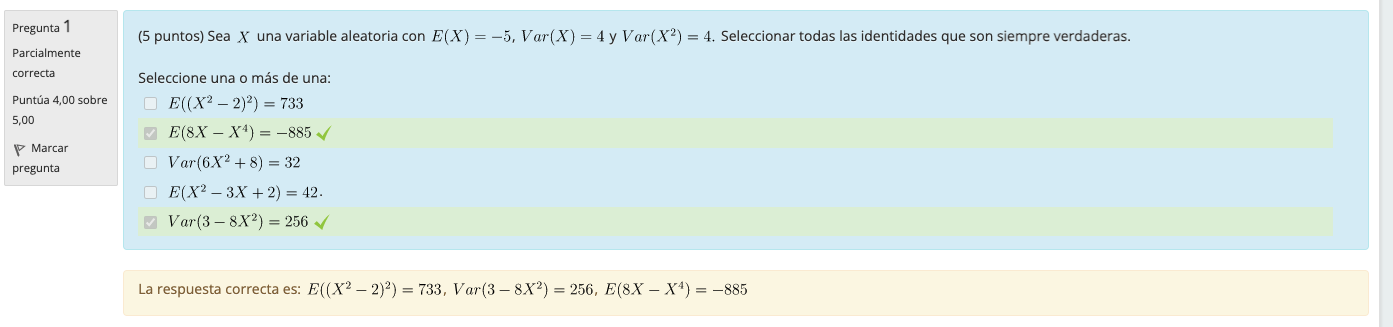

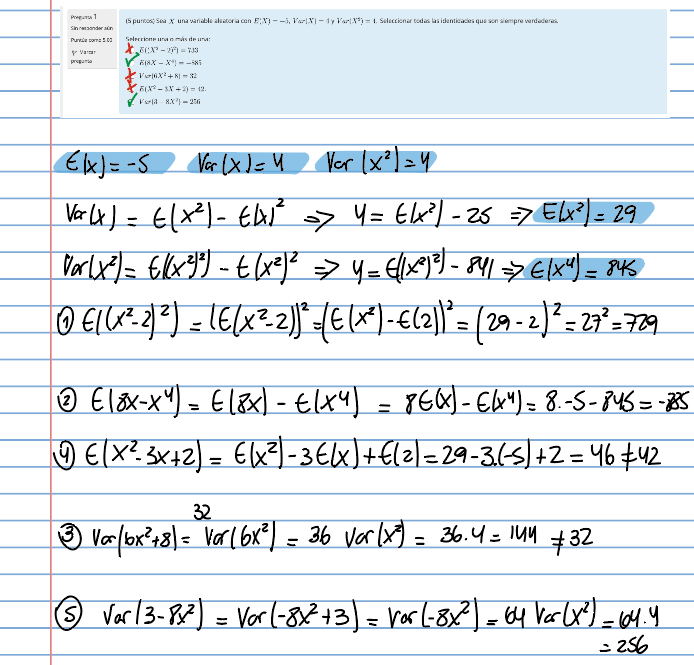

## Ejercicio 2

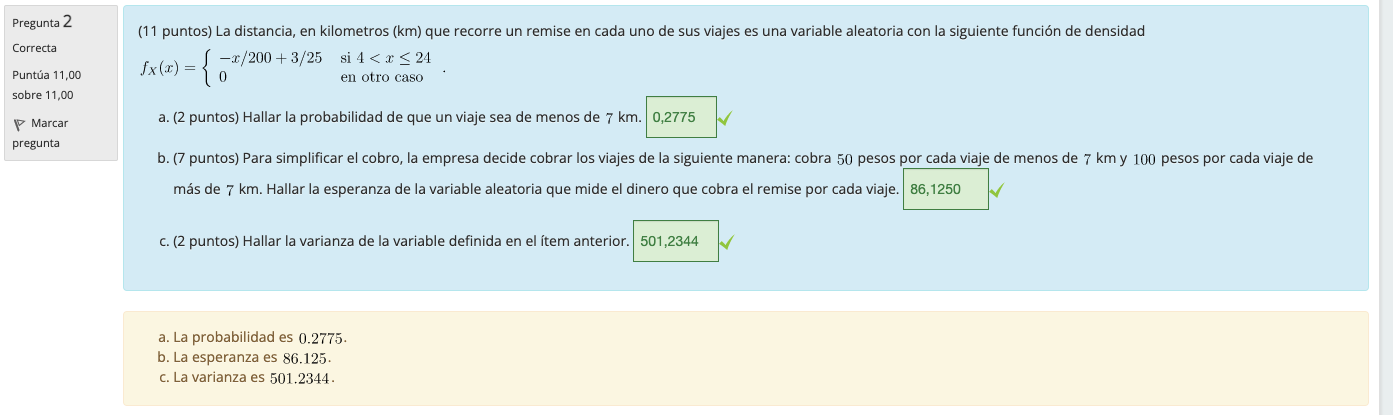

In [32]:
def f(x):
    if (4 < x <= 24):
        return -x/200 + 3/25
    else:
        return 0

In [33]:
scipy.integrate.quad(f,-np.inf, np.inf)

(1.0000000013337809, 1.3883774130363236e-09)

In [34]:
a = scipy.integrate.quad(f, 4, 7)[0]
resFinalParser(a)

0,2775


### Pregunta B

Defino Y = "Dinero cobrado por viaje"

Y se distribuye:
* 50 si x < 7
* 100 si x > 7

Luego E(Y) = 50 * P(X < 7) + 100 * P(X > 7)

In [35]:
# Proba x < 7 es la calculada en A
b = 1 - a
res = 50*a + 100*b
resFinalParser(res)

86,125


### Pregunta C

$Var(Y) = E(Y^2) - E(Y)^2 $

In [36]:
t1 = (50**2)*a + (100**2)*b
t2 = res**2
res = t1 - t2
resFinalParser(res)

501,2344


## Ejercicio 3

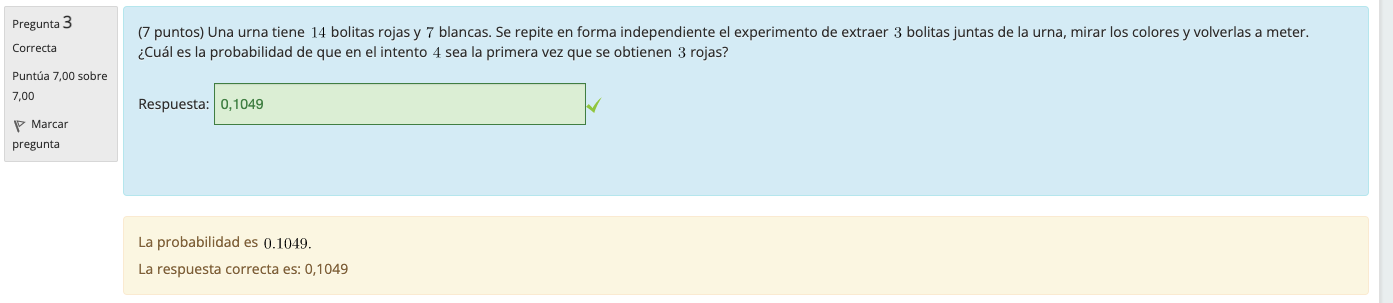

Tiene pinta de Hypergeométrica, pues tengo una población, un tipo que me interesa y un n extraído.

Luego tengo una geométrica de parametro la proba anterior

Busco la proba de la geometrica = 4

Defino X = "Cantidad de bolitas rojas extraídas de una población de 21 bolitas, de las cuales 14 rojas y 7 blancas"

$X \sim Hyper(21, 14, 3)$

Luego defino Y = "Cantidad de repeticiones necesarias hasta el primer éxito"

$Y \sim Geo(p)$ con $p = P(X=3)$

Por lo tanto busco $P(Y=4)$

In [37]:
# Hipergeométrica
M = 21 # Nro total del objetos
n = 14 # Nro total de objetos del tipo A
N = 3 # Cantidad de elementos que se extraen sin reposición
va = scipy.stats.hypergeom(M, n, N)
k = va.pmf(3)

In [38]:
# Geométrica
p = k
va = scipy.stats.geom(p)
res = va.pmf(4)
resFinalParser(res)

0,1049


## Ejercicio 4

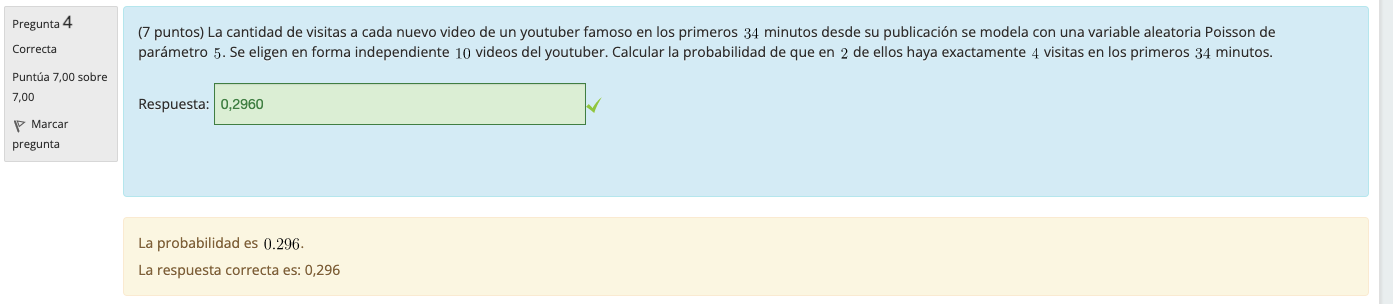

lambda = 5 visitas cada 34 minutos

Defino X = "Cantidad de visitas en 34 minutos"

X $\sim Poi(5)$

Proba 4 visitas en los pirmeros 34 minutos $\Rightarrow$ P(X=4)

Defino Y = "Cantidad de exitos en 10 repeticiones"

Y $\sim Bin(10, p)$ con $p = P(X=4)$

In [39]:
# Poisson
mu = 5
va = scipy.stats.poisson(mu)
k = va.pmf(4)

In [40]:
# Binomial
n = 10
p = k
va = scipy.stats.binom(n,p)
res = va.pmf(2)
resFinalParser(res)

0,296


## Ejercicio 5
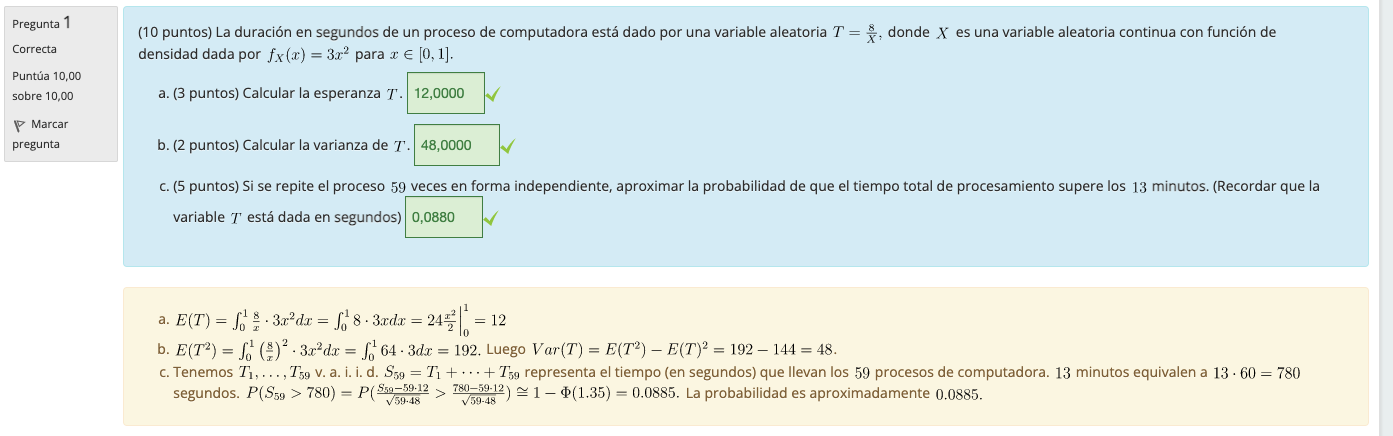

### Pregunta A

In [65]:
def f(x):
    if 0 <= x <= 1:
        return (1/x) * (3*(x**2))
    else: return 0

In [66]:
res = 8*scipy.integrate.quad(f,0, 1)[0]
resFinalParser(res)

12,0


### Pregunta B

In [43]:
def f(x):
    if 0 <= x <= 1:
        return (1/(x**2)) * (3*(x**2))
    else: return 0

In [44]:
res = 64*scipy.integrate.quad(f,0, 1)[0] - 144
resFinalParser(res)

48,0


### Pregunta C

In [47]:
# Proba de Sn > x
def TCL_suma(esp, var, n, x):
    va = scipy.stats.norm()
    k = (x - esp * n)/(math.sqrt(var*n))
    return 1 - va.cdf(k)

In [64]:
mu = 12
var = 48
res = TCL_suma(mu, var, 59, 13*60)
resFinalParser(res)

0,088


## Ejercicio 6

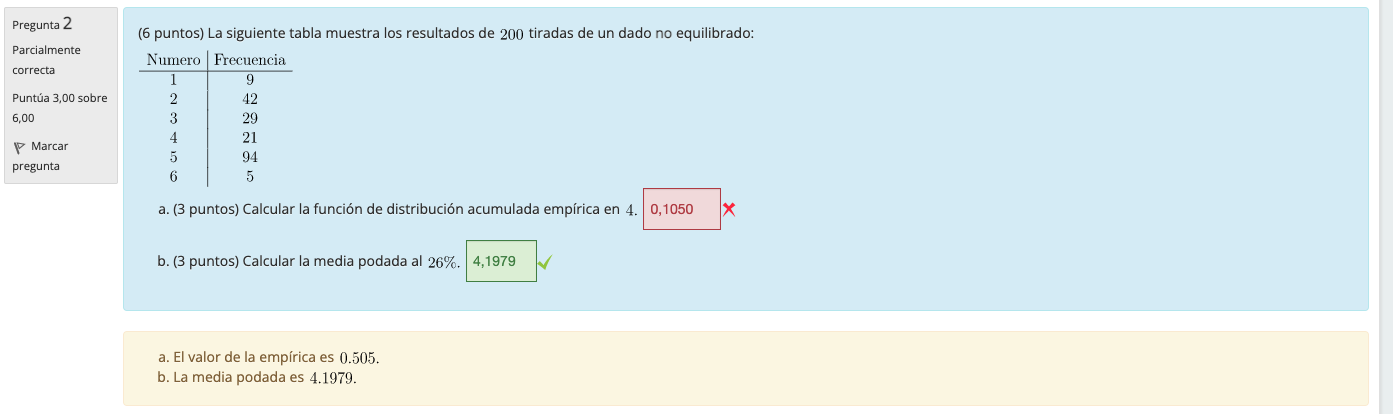

In [49]:
# Pregunta A - MAL
res = 21/200
resFinalParser(res)

0,105


In [50]:
# Pregunta B
datos = [1]*9 + [2]*42 + [3]*29 + [4]*21 + [5]*94 + [6]*5
datos = np.array(datos)
mediaPodada = scipy.stats.trim_mean(datos,proportiontocut = 0.26)
resFinalParser(mediaPodada)

4,1979


In [63]:
# Corrección preguna A - Era acumulada a 4, no puntual
res = (200-94-5)/200
resFinalParser(res)

0,505


## Ejercicio 7
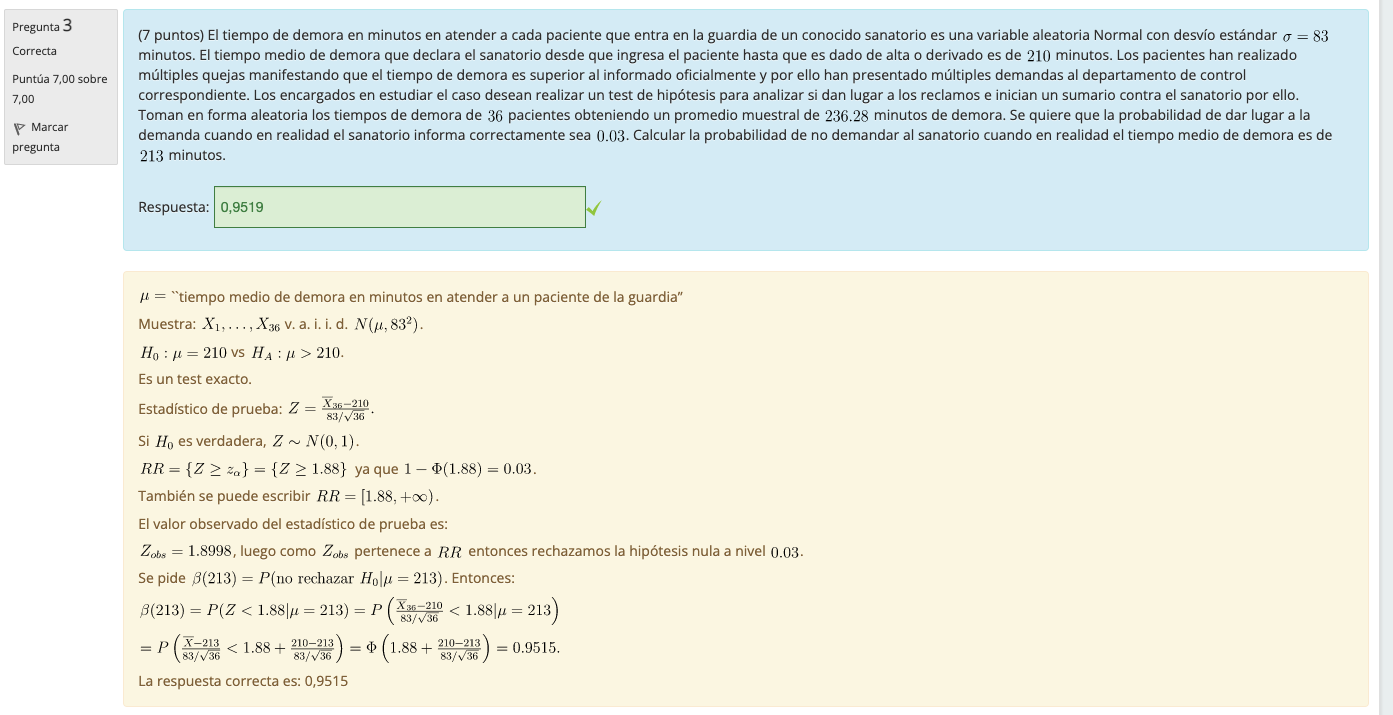

Defino X = "Tiempo de demora en minutos en atender a un paciente"

$X \sim N(\mu, 83^2)$

Datos para el test de hipótesis:

* $\mu_0 = 210$
* $n = 36$
* $\overline{X_n} = 236.28$
* $\alpha = 0.03$
* $\sigma = 83$

Defino el test de hipótesis como:

$H_0 \Rightarrow \mu_0 = 210$
$H_a \Rightarrow \mu > \mu_0$

Defino el pivote T como:

Datos datos normales, sigma conocido, mu desconocido $\Rightarrow T = Normal(0,1)$

Me piden:

Probabilidad de no demandar al sanatorio, cuando en realidad el tiempo medio de demora es 213 minutos

Error de tipo II = No rechazar H0 cuando H0 es falsa, en este caso, no demandar al sanatorio cuando H0 es falsa

Luego busco el error de tipo 2 cuando $\mu = 213$

In [74]:
# Datos
alfa = 0.03
mu_0 = 210
mu = 213
sigma = 83
n = 36

va = scipy.stats.norm()
const = (mu_0 - mu)/(sigma/math.sqrt(n))
z = va.ppf(1-alfa)
k = va.cdf(z+const)
resFinalParser(k)

0,9519


### Ejercicio 8

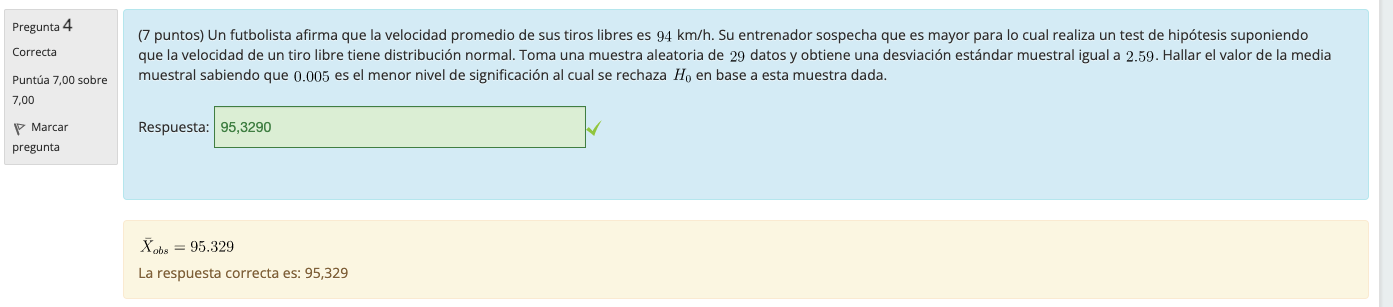

Datos

* $\mu_0 = 94$
* $n = 29$
* $sd = 2.59$
* $\alpha = 0.005$

Test de tipo 1 - $\mu > \mu_0$

Definición del pivote:

$T = \frac{\overline{X_n} - \mu_0}{sd/\sqrt{n}} \sim T_{n-1} $

Busco el z limite para el test $\Rightarrow $

In [58]:
n = 29
alfa = 0.005
va = scipy.stats.t(df=n-1)
z = va.ppf(1-alfa)

In [61]:
s = 2.59
n = 29
mu_0 = 94
XnRaya = ((z*s)/math.sqrt(n))+mu_0
resFinalParser(XnRaya)

95,329
